# Setup

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#loading the Dataset into a pandas dataframe
df = pd.read_csv('Airlines.csv')

# Stage 1 (Analysis)
interesting charts

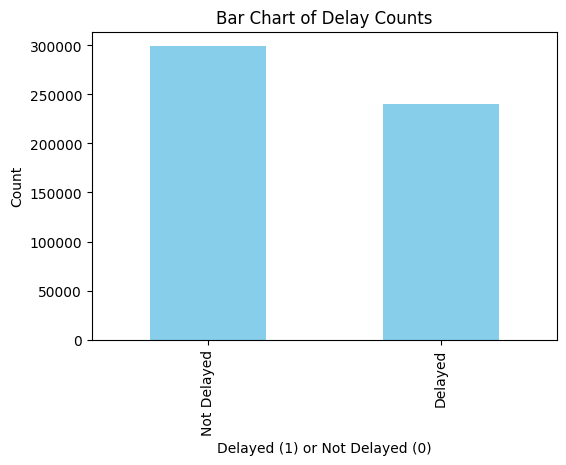

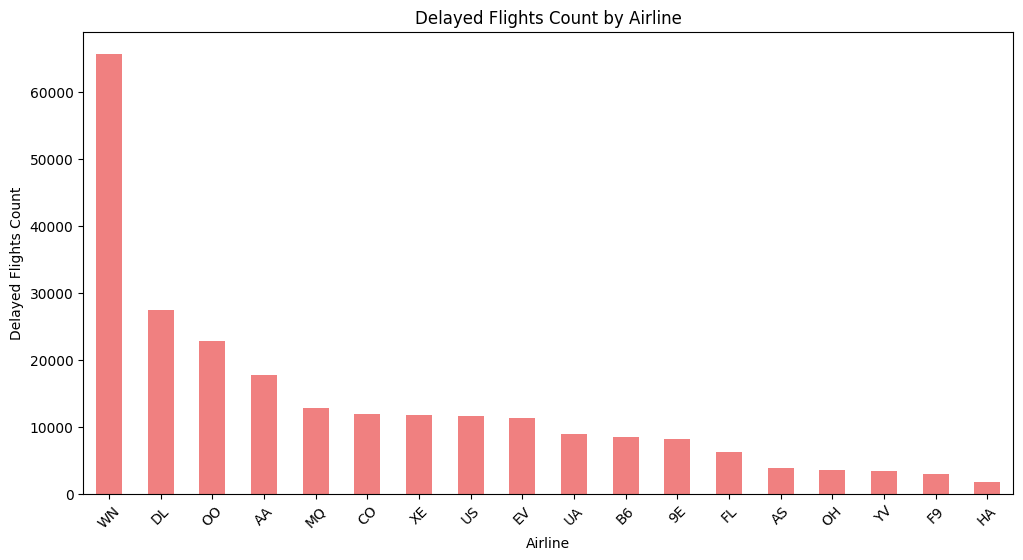

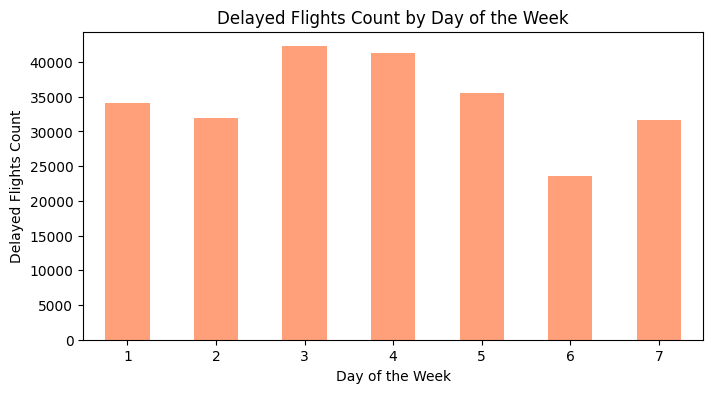

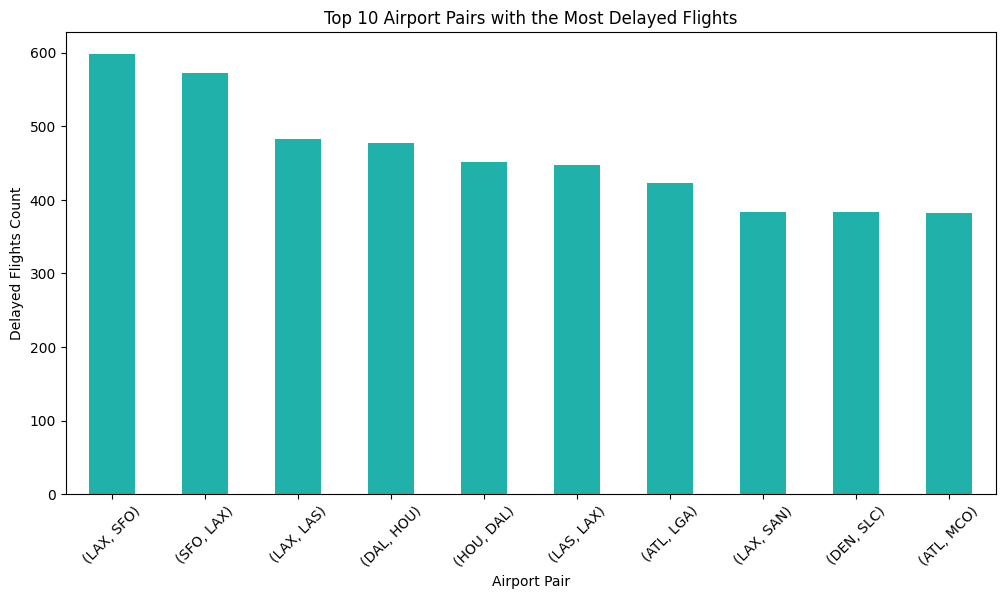

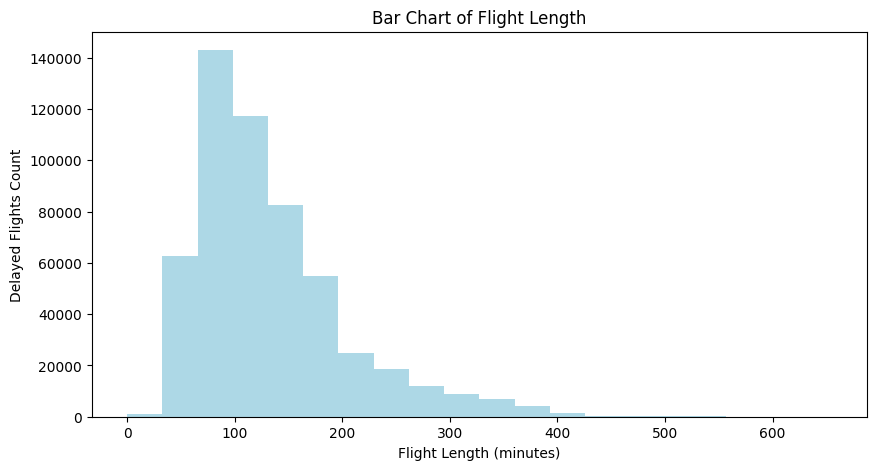

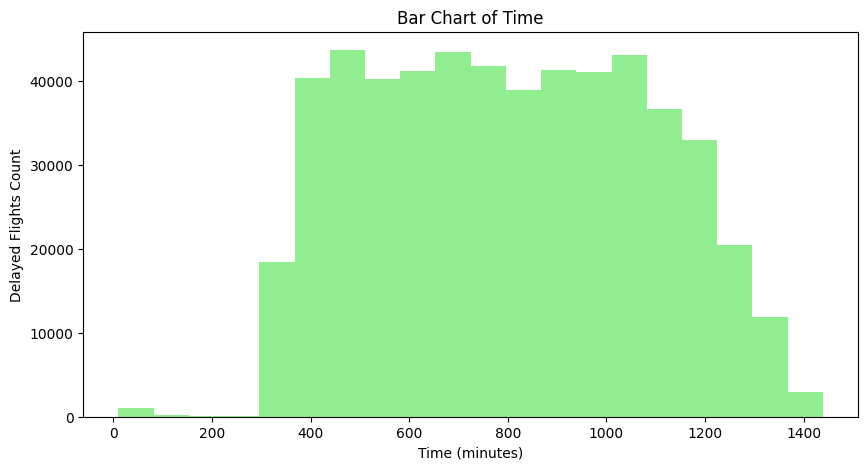

In [2]:
# 1. Bar Chart of Delay Counts
delay_counts = df['Delay'].value_counts()
plt.figure(figsize=(6, 4))
delay_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Delayed (1) or Not Delayed (0)')
plt.ylabel('Count')
plt.title('Bar Chart of Delay Counts')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
plt.show()

# 2. Bar Chart of Airlines and Delay Counts
delay_counts_by_airline = df.groupby('Airline')['Delay'].sum()
delay_counts_by_airline = delay_counts_by_airline.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
delay_counts_by_airline.plot(kind='bar', color='lightcoral')
plt.xlabel('Airline')
plt.ylabel('Delayed Flights Count')
plt.title('Delayed Flights Count by Airline')
plt.xticks(rotation=45)
plt.show()

# 3. Bar Chart of Day of the Week vs. Delay Counts
day_delay_counts = df.groupby('DayOfWeek')['Delay'].sum()
plt.figure(figsize=(8, 4))
day_delay_counts.plot(kind='bar', color='lightsalmon')
plt.xlabel('Day of the Week')
plt.ylabel('Delayed Flights Count')
plt.title('Delayed Flights Count by Day of the Week')
plt.xticks(rotation=0)
plt.show()

# 4. Bar Chart of Airport Pairs and Delay Counts
airport_pairs_delay_counts = df.groupby(['AirportFrom', 'AirportTo'])['Delay'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
airport_pairs_delay_counts.plot(kind='bar', color='lightseagreen')
plt.xlabel('Airport Pair')
plt.ylabel('Delayed Flights Count')
plt.title('Top 10 Airport Pairs with the Most Delayed Flights')
plt.xticks(rotation=45)
plt.show()

# 5. Bar Chart of Flight Length
plt.figure(figsize=(10, 5))
plt.hist(df['Length'], bins=20, color='lightblue')
plt.xlabel('Flight Length (minutes)')
plt.ylabel('Delayed Flights Count')
plt.title('Bar Chart of Flight Length')
plt.show()

# 6. Bar Chart of Time
plt.figure(figsize=(10, 5))
plt.hist(df['Time'], bins=20, color='lightgreen')
plt.xlabel('Time (minutes)')
plt.ylabel('Delayed Flights Count')
plt.title('Bar Chart of Time')
plt.show()



# Stage 2 (df Preperation)

In [3]:
# Select features and target variable
features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']
target = 'Delay'

X = df[features]
y = df[target]

# Randomly split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing

# Combine the training and testing data to ensure consistent one-hot encoding
combined_data = pd.concat([X_train, X_test])


# Display the first few rows of each split dfFrame
print("Training Set:")
print(X_train.head())

print("\nTesting Set Delay:")
print(y_train.head())

print("Training Set:")
print(X_test.head())

print("\nTesting Set Delay:")
print(y_test.head())



# Define the categorical and numeric features
categorical_features = ['Airline', 'AirportFrom', 'AirportTo']
numeric_features = ['DayOfWeek', 'Time', 'Length']

Training Set:
       Airline AirportFrom AirportTo  DayOfWeek  Time  Length
498081      F9         PDX       DEN          3   900     143
203828      WN         SAN       SJC          7  1185      80
156549      AA         LGA       DFW          5   365     250
66053       DL         BOS       MSP          6  1090     207
165376      FL         CMH       RSW          5   818     150

Testing Set Delay:
498081    0
203828    1
156549    1
66053     0
165376    1
Name: Delay, dtype: int64
Training Set:
       Airline AirportFrom AirportTo  DayOfWeek  Time  Length
442150      OO         SMF       LAX          7   881      85
229730      UA         DEN       LGA          2   665     223
69994       WN         OAK       LAS          7   465      85
414293      B6         JFK       CLT          5   990     131
171704      AS         SEA       FAI          5  1150     235

Testing Set Delay:
442150    1
229730    1
69994     1
414293    0
171704    1
Name: Delay, dtype: int64


In [7]:
# Create a ColumnTransformer to apply one-hot encoding to categorical features
max_tree_depth = 5 # max_depth=10 drinne lassen ???? ist nur drin, damit man es einfacher anpassen kann

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a Decision Tree classifier within a pipeline
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth,random_state=42)) 
])

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.6392836285769905


In [13]:
# Create arrays to store max_depth and corresponding accuracies
depths = []
accuracies = []

# Loop through max depths from 1 to 10
for max_tree_depth in range(1, 11):
    # Create a ColumnTransformer to apply one-hot encoding to categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

    # Create a Decision Tree classifier within a pipeline
    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth, random_state=42))
    ])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Max Depth: {max_tree_depth}, Accuracy: {accuracy}")

    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(depths, accuracies, marker='o')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

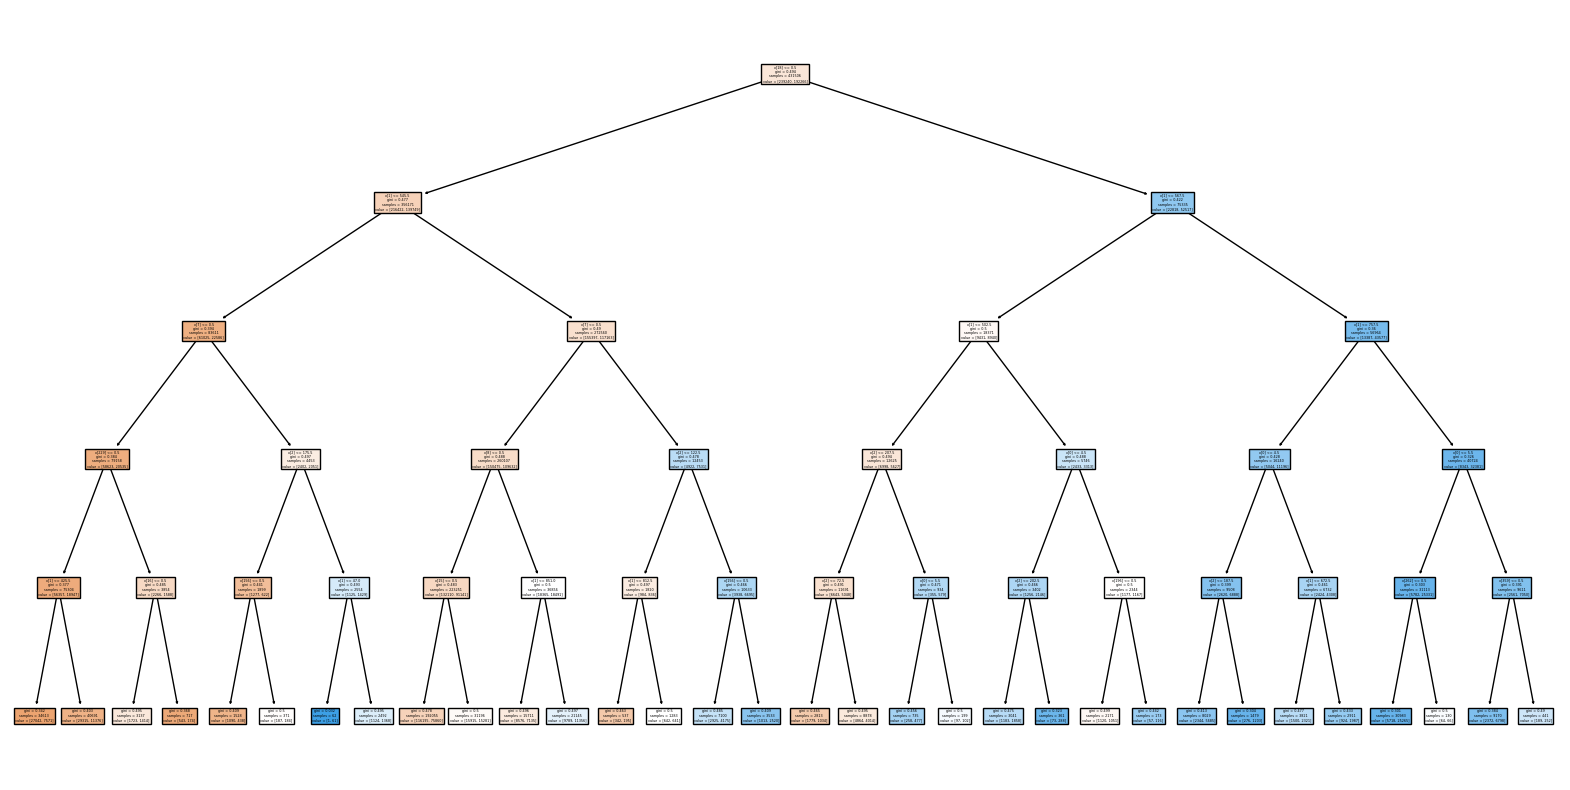

In [8]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf['classifier'], filled=True)
plt.show()
